In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.shape

(1728, 7)

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<Axes: xlabel='buying'>

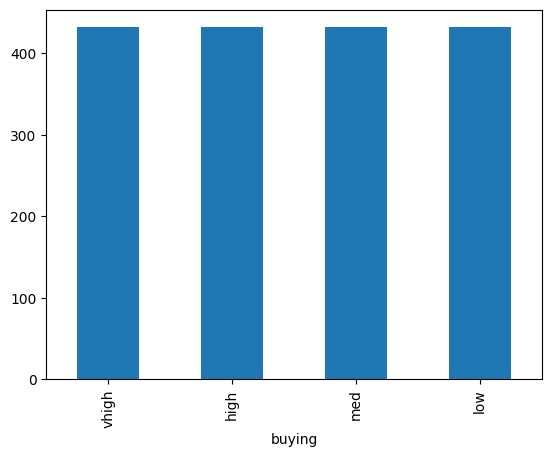

In [16]:
df['buying'].value_counts().plot(kind='bar')

<Axes: xlabel='maint'>

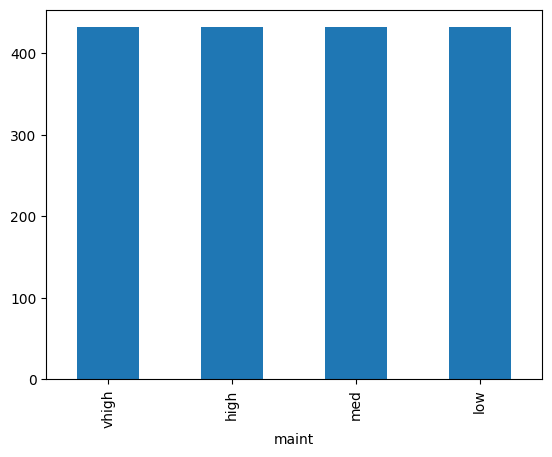

In [17]:
df['maint'].value_counts().plot(kind='bar')

In [18]:
df['maint'].value_counts()

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

<Axes: xlabel='class'>

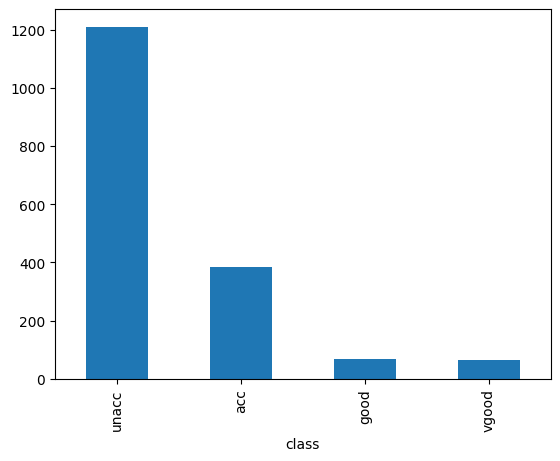

In [21]:
df['class'].value_counts().plot(kind='bar')

In [22]:
df['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [23]:
df['lug_boot'].value_counts()

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

In [30]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [31]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [34]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [35]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [36]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [40]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1728, 6)
(1157, 6)
(571, 6)


In [41]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [42]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [43]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [45]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------------------- ------------------ 5.2/9.8 MB 26.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 23.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
import category_encoders as ce

In [49]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [50]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 48 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1157 non-null   int64
 1   maint     1157 non-null   int64
 2   doors     1157 non-null   int64
 3   persons   1157 non-null   int64
 4   lug_boot  1157 non-null   int64
 5   safety    1157 non-null   int64
dtypes: int64(6)
memory usage: 63.3 KB


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=10)
dt_clf=DecisionTreeClassifier()

In [65]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [55]:
y_pred_gini=clf_gini.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
acc_sc=accuracy_score(y_pred_gini,y_test)

In [77]:
print("Accuracy score for normal DT\n",acc_sc)

Accuracy score for normal DT
 0.8021015761821366


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params_grid={'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[2,3,4,5,6,7,8,9,10],'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [66]:
grid_search=GridSearchCV(param_grid=params_grid, estimator=dt_clf,cv=5,verbose=2)

In [67]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [68]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [69]:
grid_search.best_score_

np.float64(0.9533251231527095)

In [70]:
best_dtree = grid_search.best_estimator_

In [72]:
y_pred_grid=best_dtree.predict(X_test)

In [76]:
print("Accuracy Score after doing GridSearchCV\n",accuracy_score(y_pred_grid,y_test))

Accuracy Score after doing GridSearchCV
 0.9439579684763573
